In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/trabalho/alzheimers_disease_data.csv")
dados.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
dados1 = dados[["MMSE","FunctionalAssessment","MemoryComplaints","BehavioralProblems","ADL","Diagnosis"]]
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMSE                  2149 non-null   float64
 1   FunctionalAssessment  2149 non-null   float64
 2   MemoryComplaints      2149 non-null   int64  
 3   BehavioralProblems    2149 non-null   int64  
 4   ADL                   2149 non-null   float64
 5   Diagnosis             2149 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 100.9 KB


In [ ]:
dados1.isna().sum()

,0
MMSE,0
FunctionalAssessment,0
MemoryComplaints,0
BehavioralProblems,0
ADL,0
Diagnosis,0


In [ ]:
dados.duplicated().sum()
# dados = dados.drop_duplicates()

np.int64(0)

In [ ]:
binarias = [col for col in dados1.columns if dados1[col].isin([0,1]).all()]

In [ ]:
tabela = pd.DataFrame({
    col: dados1[col].value_counts()
    for col in binarias
}).T

# Renomear colunas para clareza
tabela.columns = ['0', '1']

tabela

,0,1
MemoryComplaints,1702,447
BehavioralProblems,1812,337
Diagnosis,1389,760


In [ ]:
# variáveis numericas:
var_num = dados1.columns.difference(binarias)
dados1[var_num].describe()

,ADL,FunctionalAssessment,MMSE
count,2149.000000,2149.000000,2149.000000
mean,4.982958,5.080055,14.755132
std,2.949775,2.892743,8.613151
min,0.001288,0.000460,0.005312
25%,2.342836,2.566281,7.167602
50%,5.038973,5.094439,14.441660
75%,7.581490,7.546981,22.161028
max,9.999747,9.996467,29.991381


In [ ]:
y = dados1["Diagnosis"]
x = dados1.drop(["Diagnosis"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y,random_state=42)

scale = StandardScaler()
for col in var_num:
    X_train[col] = scale.fit_transform(X_train[[col]])
    X_test[col]  = scale.transform(X_test[[col]])


In [ ]:
from tensorflow.keras.metrics import Recall, AUC

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(50, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, validation_split= 0.3
                    ,
                    callbacks = [EarlyStopping(monitor='val_loss',patience=3)]
                    )

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6730 - loss: 0.6601 - val_accuracy: 0.8142 - val_loss: 0.5593
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7951 - loss: 0.5426 - val_accuracy: 0.8341 - val_loss: 0.4430
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8011 - loss: 0.4570 - val_accuracy: 0.8518 - val_loss: 0.3756
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8258 - loss: 0.4056 - val_accuracy: 0.8695 - val_loss: 0.3299
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8603 - loss: 0.3449 - val_accuracy: 0.8916 - val_loss: 0.3031
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8670 - loss: 0.3195 - val_accuracy: 0.8872 - val_loss: 0.2873
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8599 - loss: 0.3378 - val_accuracy: 0.8894 - val_loss: 0.2807
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8782 - loss: 0.3277 - val_accuracy: 0.9004 - 

In [ ]:
test_loss, test_acuracia = model.evaluate(X_test, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8982 - loss: 0.3250 


In [ ]:
y_pred_proba = model.predict(X_test)
# Converter para classe 0/1 com threshold padrão de 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)

Matriz de Confusão:
 [[388  29]
 [ 25 203]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-score:  {f1:.3f}")

Precision: 0.875
Recall:    0.890
F1-score:  0.883


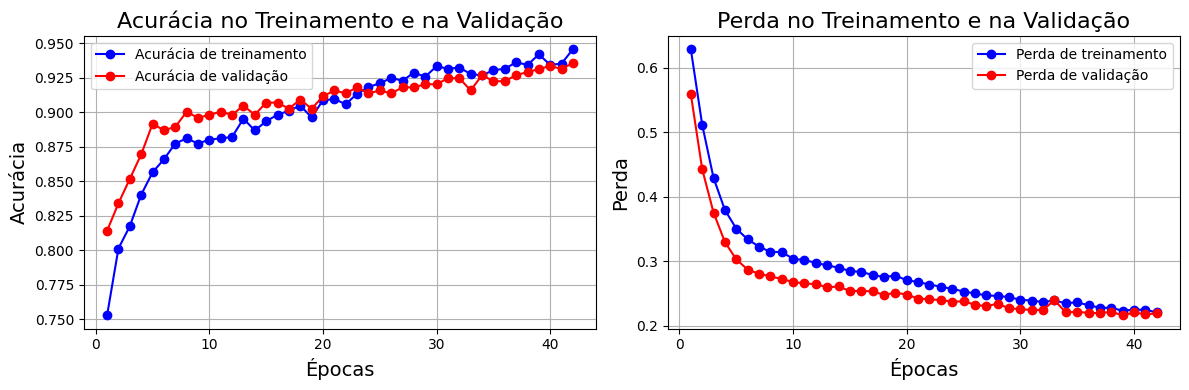

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'o-', color = 'blue', label = 'Acurácia de treinamento')
plt.plot(epochs, val_acc, 'o-', color = 'red', label = 'Acurácia de validação')
plt.title('Acurácia no Treinamento e na Validação', fontsize = 16)
plt.xlabel('Épocas', fontsize = 14)
plt.ylabel('Acurácia', fontsize = 14)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'o-', color = 'blue', label = 'Perda de treinamento')
plt.plot(epochs, val_loss, 'o-', color = 'red', label = 'Perda de validação')
plt.title('Perda no Treinamento e na Validação', fontsize = 16)
plt.xlabel('Épocas', fontsize = 14)
plt.ylabel('Perda', fontsize = 14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()